In [7]:
""


from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
#loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/Masked_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

device = 'cuda:0'
all_graphs_weights_df.shape=(43150, 4921)


((648, 4921), (43150,))

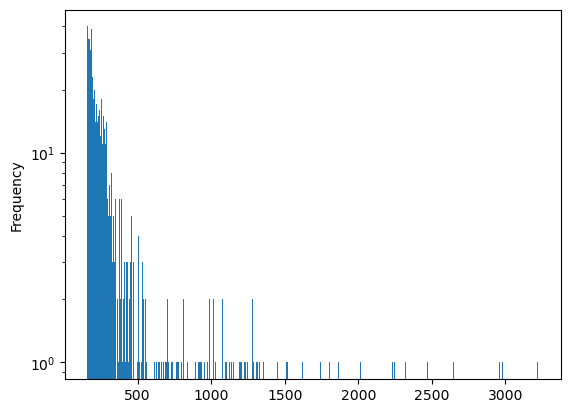

In [8]:
edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 98.5)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=500)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

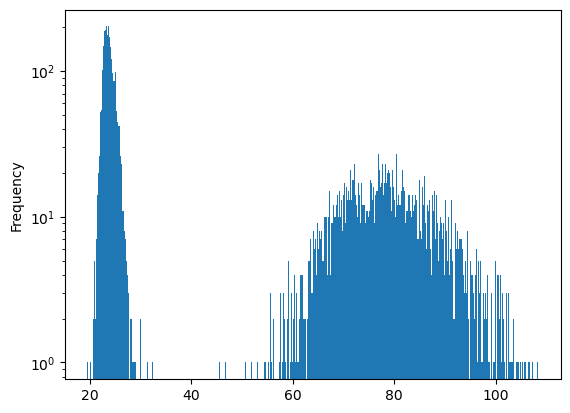

In [9]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [10]:
loader_path = "./results/dataloaders/MASKED_loader_Concen_plus_Fluxes.pt"
loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
loader_train = loader.get_train_loader()
train_labels = []
for graph in tqdm.tqdm(loader_train.dataset):
    train_labels.append(graph.y.cpu().item())
train_labels.__len__()


filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = ["PKU" if l == 0 else "Control" for l in train_labels] 


filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

100%|██████████| 4921/4921 [00:00<00:00, 291684.38it/s]


,12,160,441,470,484,487,517,619,704,743,...,42594,42596,42650,42810,42812,42978,43057,43069,43070,Label
0,0.024405,0.018343,0.007531,0.015552,0.016767,0.012376,0.013909,0.012097,0.014660,0.020628,...,0.013880,0.015529,0.017059,0.017150,0.015232,0.013590,0.013861,0.008630,0.016526,PKU
1,0.017865,0.012101,0.011685,0.013270,0.016142,0.025369,0.013851,0.012109,0.010115,0.013636,...,0.014226,0.014171,0.016575,0.017097,0.018272,0.014966,0.016678,0.015017,0.012774,Control
2,0.018530,0.013691,0.013192,0.012869,0.014084,0.013395,0.013811,0.013607,0.013432,0.014605,...,0.014293,0.013849,0.014928,0.014413,0.014542,0.013920,0.015172,0.013251,0.013552,Control
3,0.029785,0.375085,0.404939,0.721066,0.027804,0.036327,0.013349,0.035730,0.100402,0.099224,...,0.298768,0.101711,0.222584,0.082146,0.034625,0.050927,0.031187,0.026876,0.119366,PKU
4,0.022342,0.017065,0.010285,0.011388,0.015903,0.034821,0.013900,0.012760,0.011954,0.018600,...,0.014236,0.013526,0.016243,0.015932,0.011735,0.013877,0.014360,0.009122,0.013267,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.018683,0.024019,0.475481,0.645979,0.042934,0.033178,0.013393,0.080601,0.065333,0.082004,...,0.450838,0.037002,0.017263,0.033622,0.053997,0.042966,0.070175,0.038765,0.087701,PKU
4917,0.028527,0.014576,0.018783,0.021661,0.021070,0.039259,0.014828,0.015117,0.009582,0.016675,...,0.013931,0.017672,0.015063,0.017889,0.016345,0.014275,0.016629,0.013392,0.011308,PKU
4918,0.097899,0.018056,0.275970,0.402302,0.102330,0.018398,0.013128,0.099573,0.108109,0.127019,...,0.240690,0.038124,0.040758,0.064899,0.115464,0.016752,0.049297,0.038290,0.174726,PKU
4919,0.376188,0.112041,0.348229,0.877676,0.172929,0.026424,0.038201,0.205802,0.087316,0.143364,...,0.235650,0.035313,0.067387,0.124537,0.196400,0.026492,0.075817,0.095719,0.379377,Control


In [11]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [12]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]
edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})

labels =  ["PKU" if l == 0 else "Control" for l in train_labels] 

print(all_graphs_weights_df.shape, labels.__len__())
edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]

#pd.Series(labels).to_csv("./results/data/Mask_results_for_R_labels.csv")
edges_node_names_explainer_subgraphs.to_csv("./results/data/Masked_edges_node_names_explainer_subgraphs.csv")

(43150, 4921) 4921
